# Project: 
# Develop a Simple Data Analysis Application with MachineLearning model

### About the data set:

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('health_activity_data.csv')
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No


In [3]:
## To know about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                        1000 non-null   object 
 13  Alco

In [4]:
### To check the missing values
df.isnull().sum()

ID                              0
Age                             0
Gender                          0
Height_cm                       0
Weight_kg                       0
BMI                             0
Daily_Steps                     0
Calories_Intake                 0
Hours_of_Sleep                  0
Heart_Rate                      0
Blood_Pressure                  0
Exercise_Hours_per_Week         0
Smoker                          0
Alcohol_Consumption_per_Week    0
Heart_Disease                   0
dtype: int64

In [5]:
### Here the blood pressure in the object data type to convert it into int data type
df.columns = df.columns.str.strip()
df['Blood_Pressure'] = df['Blood_Pressure'].astype(str).str.replace('/', '').astype(int)
print(df['Blood_Pressure'].head())

0    13772
1    12965
2    12768
3    12586
4    10064
Name: Blood_Pressure, dtype: int32


In [6]:
df.tail() # shows the last five rows

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Heart_Disease
995,996,18,Male,179,116,31.67,10095,2667,4.6,79,10863,6.3,No,5,No
996,997,35,Female,170,114,23.88,11361,2351,7.2,54,9875,2.9,No,3,Yes
997,998,49,Female,169,85,23.44,9531,2416,4.5,80,12565,7.6,No,4,No
998,999,64,Male,155,74,22.34,5270,2080,5.8,101,12986,5.4,No,4,No
999,1000,66,Female,171,86,20.64,10906,1284,8.5,72,11883,1.3,No,1,No


In [8]:
# To check for duplicates
df.duplicated().sum()

0

There is no duplicates in the dataset

In [9]:
# To describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,500.50000,288.819436,1.0,250.750,500.5,750.25,1000.00
Age,1000.0,49.85700,18.114267,18.0,35.000,50.0,66.00,79.00
Height_cm,1000.0,174.74500,14.541920,150.0,162.000,175.0,187.00,199.00
Weight_kg,1000.0,84.35200,20.065960,50.0,68.000,84.0,101.00,119.00
BMI,1000.0,26.72951,4.786341,18.5,22.600,26.8,30.85,34.98
Daily_Steps,1000.0,10717.03400,5444.707891,1016.0,6028.250,10898.0,15253.25,19931.00
Calories_Intake,1000.0,2327.11700,657.847942,1201.0,1745.750,2328.5,2880.00,3498.00
Hours_of_Sleep,1000.0,6.90990,1.779640,4.0,5.300,6.9,8.40,10.00
Heart_Rate,1000.0,84.71000,20.130155,50.0,67.000,84.0,103.00,119.00
Blood_Pressure,1000.0,11469.55200,1448.413887,9062.0,10260.000,11387.5,12685.25,13988.00


#### Checking for outliers by IQR method

In [10]:
# Dectecting outliers by using IQR method

def detect_outliers_iqr(df, features):
    outlier_indices = {}

    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] = outliers.index.tolist()

    return outlier_indices

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'ID']

outliers = detect_outliers_iqr(df, numeric_cols)

print("Outlier Counts:")
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")

Outlier Counts:
Age: 0 outliers
Height_cm: 0 outliers
Weight_kg: 0 outliers
BMI: 0 outliers
Daily_Steps: 0 outliers
Calories_Intake: 0 outliers
Hours_of_Sleep: 0 outliers
Heart_Rate: 0 outliers
Exercise_Hours_per_Week: 0 outliers
Alcohol_Consumption_per_Week: 0 outliers


#### Decting outliers by using box plot

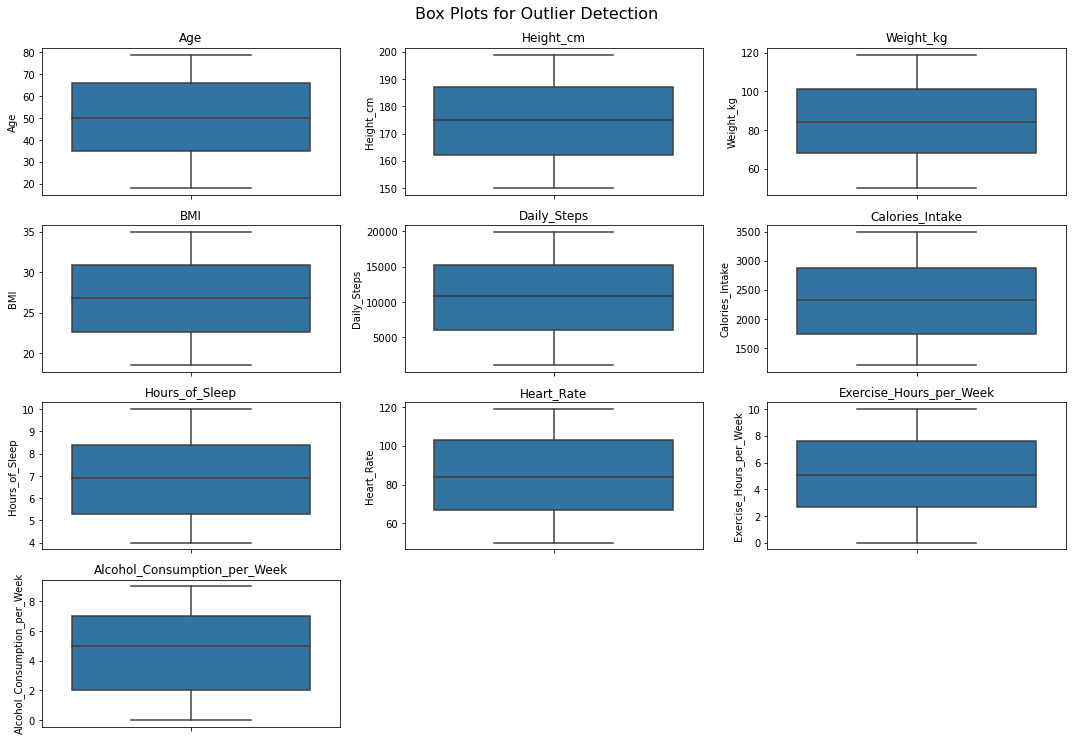

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'ID']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

#### Checking the BMI status of the people by using scatter plot

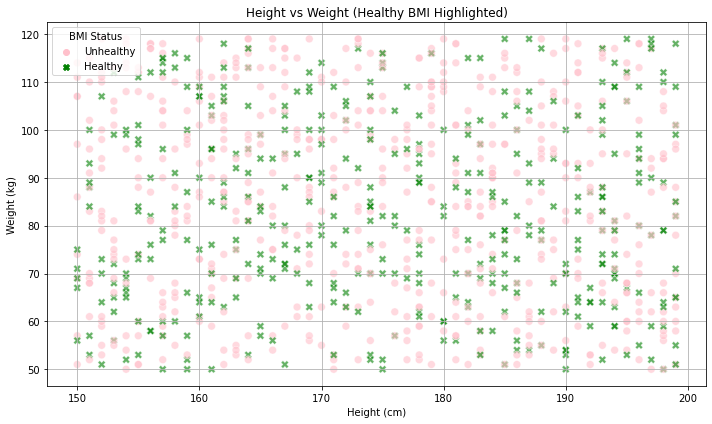

In [12]:
df['BMI_Status'] = df['BMI'].apply(lambda x: 'Healthy' if 18.5 <= x <= 24.9 else 'Unhealthy')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Height_cm',
    y='Weight_kg',
    hue='BMI_Status',
    style='BMI_Status',
    palette={'Healthy': 'green', 'Unhealthy': 'pink'},
    alpha=0.6,
    s=60  # marker size
)
plt.title('Height vs Weight (Healthy BMI Highlighted)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='BMI Status')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Checking percentage of heart disease by using pie-chart

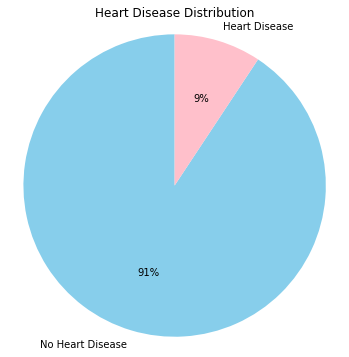

In [13]:
heart_counts = df['Heart_Disease'].value_counts()

labels = ['No Heart Disease', 'Heart Disease']
colors = ['skyblue', 'pink']

plt.figure(figsize=(6, 6))
plt.pie(heart_counts, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)
plt.title('Heart Disease Distribution')
plt.axis('equal')  
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### Using Lable Encoder to convert the catogrical value into numerical value

In [30]:
le_disease = LabelEncoder()
df['Heart_Disease'] = le_disease.fit_transform(df['Heart_Disease'])
df['Gender'] = le_disease.fit_transform(df['Gender'])
df['Smoker'] = le_disease.fit_transform(df['BMI_Status'])
df['BMI_Status'] = le_disease.fit_transform(df['Smoker'])
df.tail()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Heart_Disease,BMI_Status
995,996,18,1,179,116,31.67,10095,2667,4.6,79,10863,6.3,1,5,0,1
996,997,35,0,170,114,23.88,11361,2351,7.2,54,9875,2.9,0,3,1,0
997,998,49,0,169,85,23.44,9531,2416,4.5,80,12565,7.6,0,4,0,0
998,999,64,1,155,74,22.34,5270,2080,5.8,101,12986,5.4,0,4,0,0
999,1000,66,0,171,86,20.64,10906,1284,8.5,72,11883,1.3,0,1,0,0


Here we conver the values 'Yes' and 'No' into 1 and 0 respectively and male and female as 1 and 0 respectively.
Converting like this will be easy to train the machine.

### Bar Plot

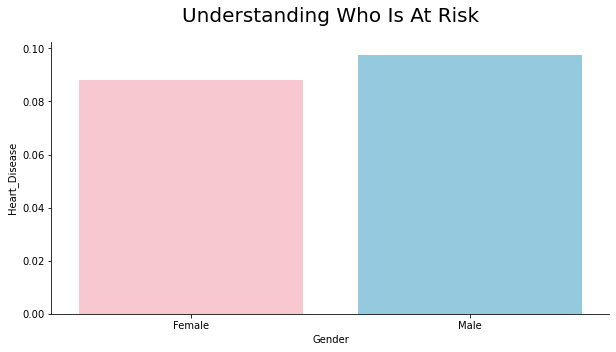

In [54]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["Gender"], y = df["Heart_Disease"], palette=['pink','skyblue'], ci=0)
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.title("Understanding Who Is At Risk", size=20, pad=20)
sns.despine()
plt.show()

From the above visulalization we analysed that female has the high rate of getting heart_disease than the male.

## Model Development:

In [23]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate', 'Blood_Pressure',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Heart_Disease', 'BMI_Status'],
      dtype='object')

In [43]:
# Inputs and output
df.drop('BMI_Status', axis = 1)
x = df.drop('Heart_Disease', axis =1)
y = df['Heart_Disease']

# traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Using Decision tree Algorithm

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.825

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       186
           1       0.04      0.07      0.05        14

    accuracy                           0.82       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.86      0.82      0.84       200


Confusion Matrix:
 [[164  22]
 [ 13   1]]


### Plotting of the confusion Matrix

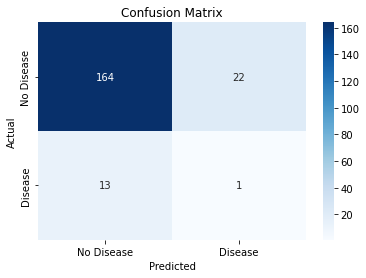

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Test Result

In [53]:
actual_value = le_disease.inverse_transform(y_test)
predicted_value = le_disease.inverse_transform(y_pred)
result_df = pd.DataFrame({'Actual Value': actual_value, 'Predicted Value': predicted_value})
result_df.head(5)

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


The dataset has more number of "No disease" as result so we have to train with more data for the high accuarcy.